# PMA-SynRM example

In this notebook, measured PMA-SynRM flux linkage maps are post-processed using apollo.  
Inductances, MTPA and self-sensing capabilities are computed according with [1].

[1] Berto, M.; Alberti, L.; Manzolini, V. & Bolognani, S.
Computation of Self-Sensing Capabilities of Synchronous Machines for Rotating High Frequency Voltage Injection Sensorless Control 
IEEE Transactions on Industrial Electronics, 2021.  
https://ieeexplore.ieee.org/document/9403927

In [11]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# import apollo
from dolomites import apollo

# set font size for figures
mpl.rcParams.update({'font.size': 14})

In [12]:
# load the data from a file
file_name = 'PMA-SynRM_data.txt'

data = pd.read_csv(file_name, sep='\s+', comment='#',
                   names=["theta_m", "i_d", "i_q", "lambda_d", "lambda_q", "torque"])

# create maps
mot = apollo.fm(data)
mot.create_maps(0)

created maps for theta_m = 0


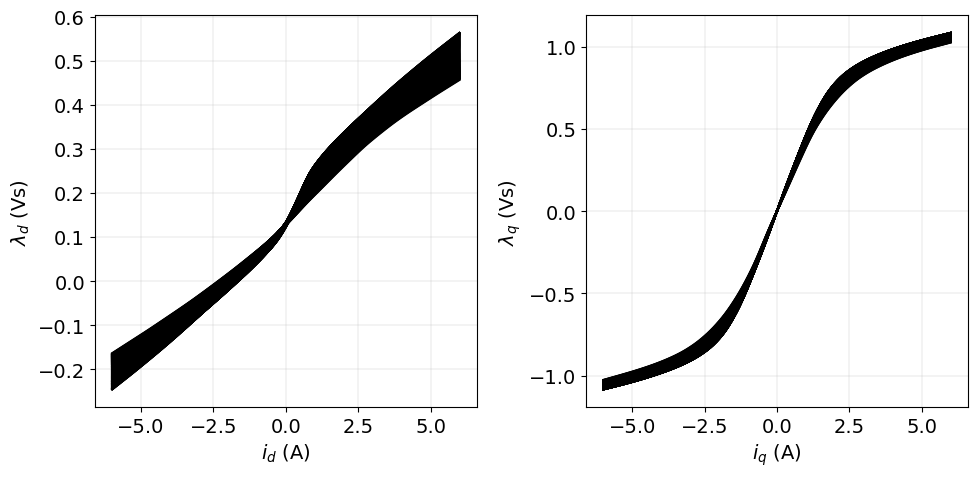

In [13]:
# plot the flux-linkage characteristics (loaded data)
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(mot.i_d, mot.lambda_d, color="black")
plt.xlabel('$i_d$ (A)')
plt.ylabel('$\lambda_d$ (Vs)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(1, 2, 2)
ax.plot(mot.i_q.T, mot.lambda_q.T, color="black")
plt.xlabel('$i_q$ (A)')
plt.ylabel('$\lambda_q$ (Vs)')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()

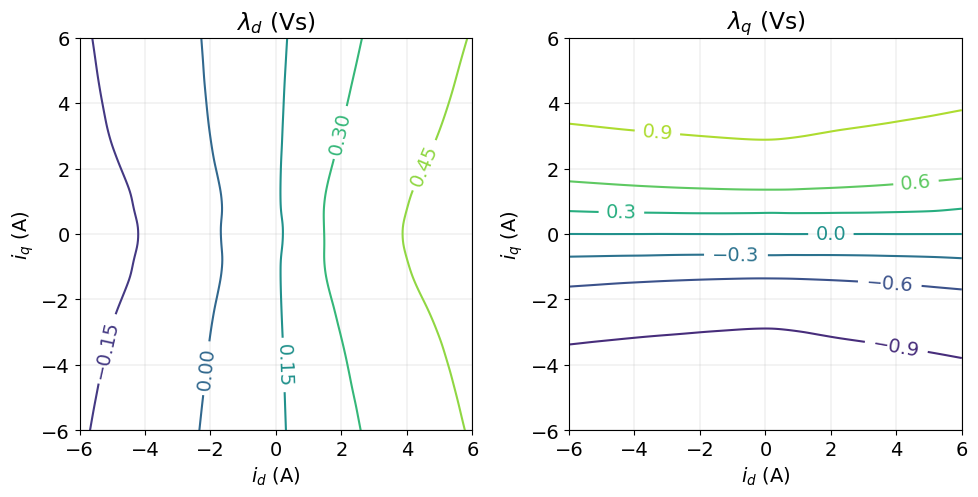

In [14]:
# plot the flux-linkage characteristics (loaded data) - contour plot
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
CS = ax.contour(mot.i_d, mot.i_q, mot.lambda_d)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$\lambda_d$ (Vs)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(1, 2, 2)
CS = ax.contour(mot.i_d, mot.i_q, mot.lambda_q)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$\lambda_q$ (Vs)')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()

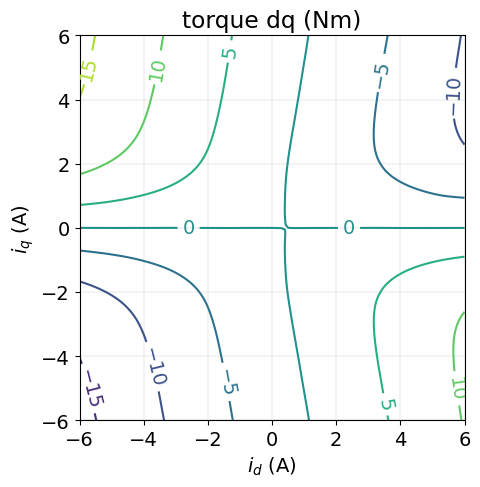

In [15]:
# compute and plot the dq torque
p = 2 # set the number of pole pairs
torque_dq = 3/2 * p * (mot.lambda_d * mot.i_q - mot.lambda_q * mot.i_d)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
CS = ax.contour(mot.i_d, mot.i_q, torque_dq)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('torque dq (Nm)')
plt.grid(linewidth=0.2)
plt.show()

# Apparent inductances

The apparent inductances are computed as:

$$
\begin{equation}
L_d(i_d,i_q) = \dfrac{\lambda_d(i_d,i_q) - \lambda_d(0,i_q)}{i_d}\\
L_q(i_d,i_q) = \dfrac{\lambda_q(i_d,i_q) - \lambda_q(i_d,0)}{i_q}
\end{equation}
$$

computed apparent inductances


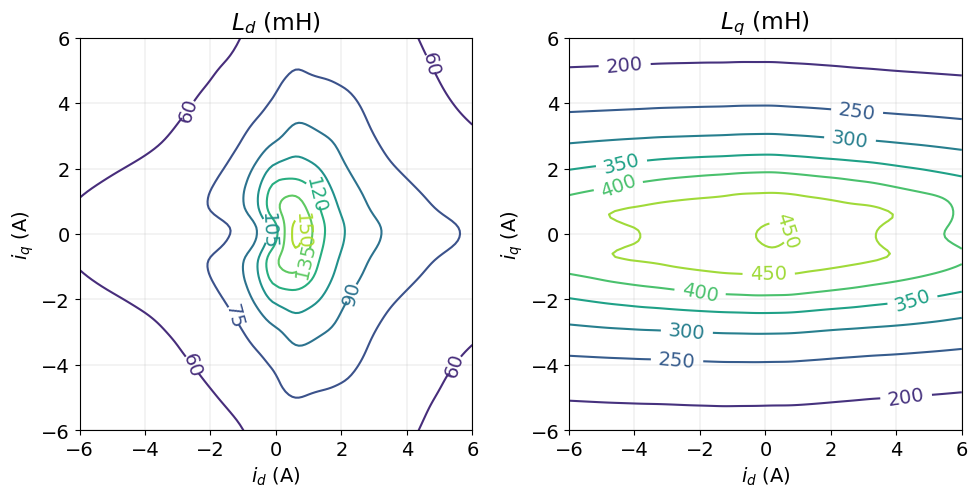

In [16]:
# compute the apparent inductances
mot.calc_apparent_inductances()

# plot the apparent inductances Ld and Lq
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 2, 1)
CS = ax.contour(mot.i_d, mot.i_q, mot.Ld*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$L_d$ (mH)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(1, 2, 2)
CS = ax.contour(mot.i_d, mot.i_q, mot.Lq*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$L_q$ (mH)')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()

# Incremental inductances

The incremental inductances are computed as:

$$
\begin{equation}
l_{dd}(i_d,i_q) = \dfrac{\partial \lambda_d(i_d,i_q)}{\partial i_d}\\
l_{dq}(i_d,i_q) = \dfrac{\partial \lambda_d(i_d,i_q)}{\partial i_q}\\
l_{qd}(i_d,i_q) = \dfrac{\partial \lambda_q(i_d,i_q)}{\partial i_d}\\
l_{qq}(i_d,i_q) = \dfrac{\partial \lambda_q(i_d,i_q)}{\partial i_q}\\
l_\Sigma(i_d,i_q) = \dfrac{l_{qq}(i_d,i_q) + l_{dd}(i_d,i_q)}{2}\\
l_\Delta(i_d,i_q) = \dfrac{l_{qq}(i_d,i_q) - l_{dd}(i_d,i_q)}{2}
\end{equation}
$$

computed incremental inductances using gradient


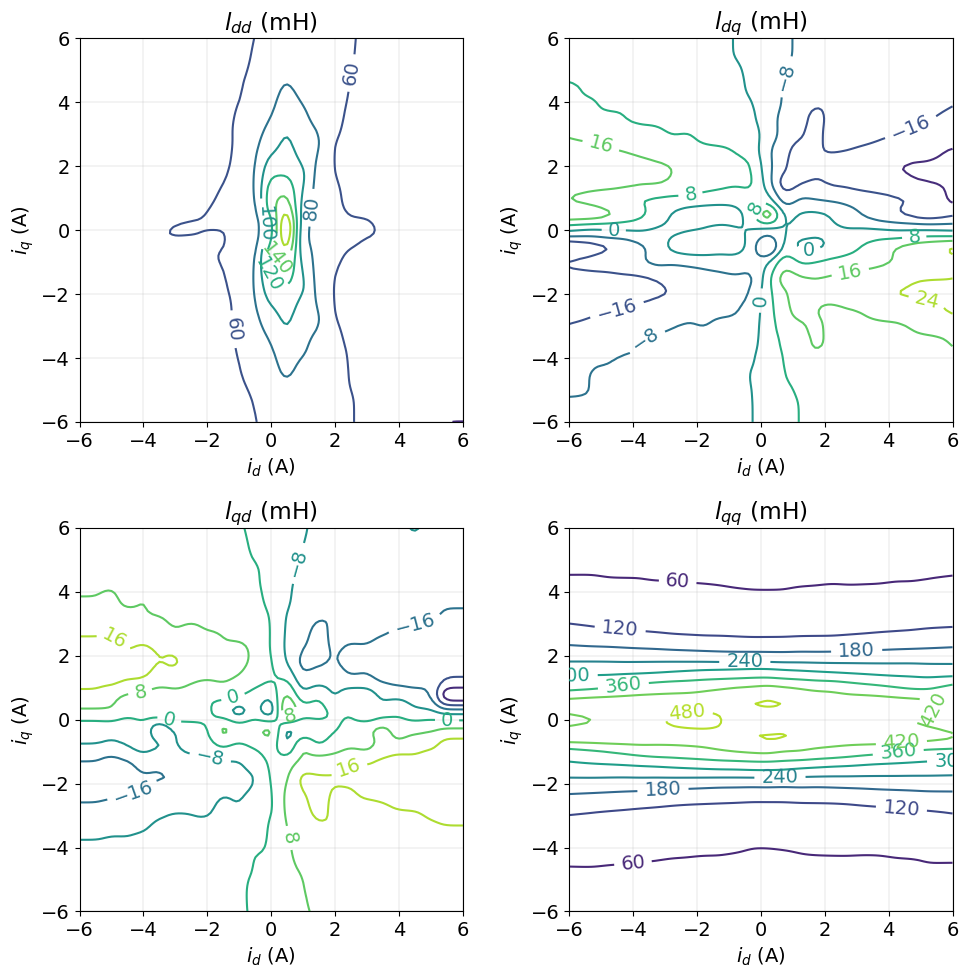

In [17]:
# compute the incremental inductances
mot.calc_incremental_inductances(method = 'gradient')


# plot the incremental inductances ldd, ldq, lqd and lqq
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2, 2, 1)
CS = ax.contour(mot.i_d, mot.i_q, mot.ldd*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_{dd}$ (mH)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(2, 2, 2)
CS = ax.contour(mot.i_d, mot.i_q, mot.ldq*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_{dq}$ (mH)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(2, 2, 3)
CS = ax.contour(mot.i_d, mot.i_q, mot.lqd*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_{qd}$ (mH)')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(2, 2, 4)
CS = ax.contour(mot.i_d, mot.i_q, mot.lqq*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_{qq}$ (mH)')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()

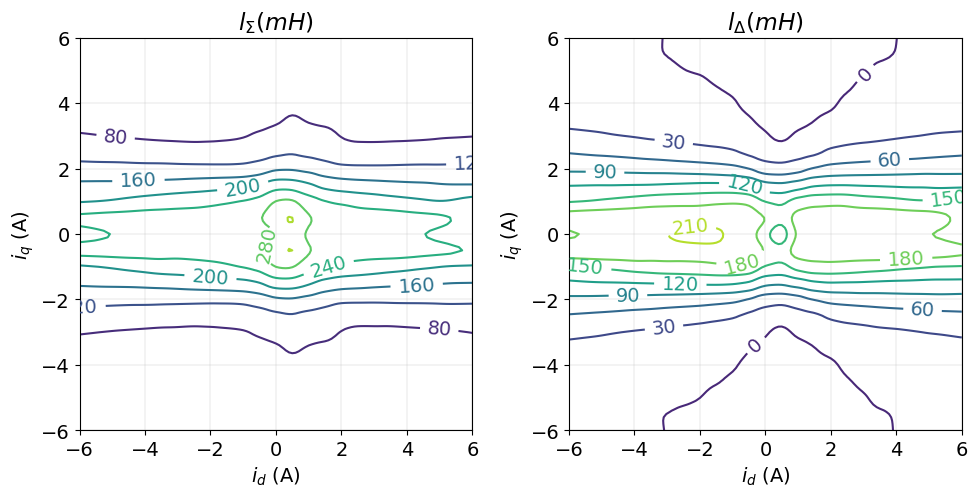

In [18]:
# plot the incremental inductances lsigma and ldelta
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
CS = ax.contour(mot.i_d, mot.i_q, mot.lsigma*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_\Sigma (mH)$')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(1, 2, 2)
CS = ax.contour(mot.i_d, mot.i_q, mot.ldelta*1000)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$l_\Delta (mH)$')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()

# MTPA

The MTPA can be computed with two methods:

* "gradient"<br/>
This method can be used when the Maxwell torque is available.<br/>
The derivative of the torque $m$ with respect to the current angle $\alpha_{ie}$ is computed as:

$$
\begin{equation}
\frac{\partial m(i_d,i_q)}{\partial \alpha_{ie}}= - \frac{\partial m(i_d,i_q)}{\partial i_d} \, i_q + \frac{\partial m(i_d,i_q)}{\partial i_q} \, i_d
\end{equation}
$$

* "analytical".<br/>
This method can be used in any case as long as you have already calculated the incremental inductances.<br/>
The derivative of the torque $m$ with respect to the current angle $\alpha_{ie}$ is computed as:

$$
\begin{equation}
\frac{\partial m(i_d,i_q)}{\partial \alpha_{ie}}= [l_{dq}(i_d,i_q) + l_{qd}(i_d,i_q)] i_d i_q - [l_{dd}(i_d,i_q) i_q^2 + l_{qq}(i_d,i_q) i_d^2] + \lambda_d(i_d,i_q) i_d + \lambda_q(i_d,i_q) i_q
\end{equation}
$$

In both cases the MTPA is extracted from $\frac{\partial m(i_d,i_q)}{\partial \alpha_{ie}}=0$

auto-detected MTPA quadrant using IPM convention
computed MTPA on quadrant 2 using analytical


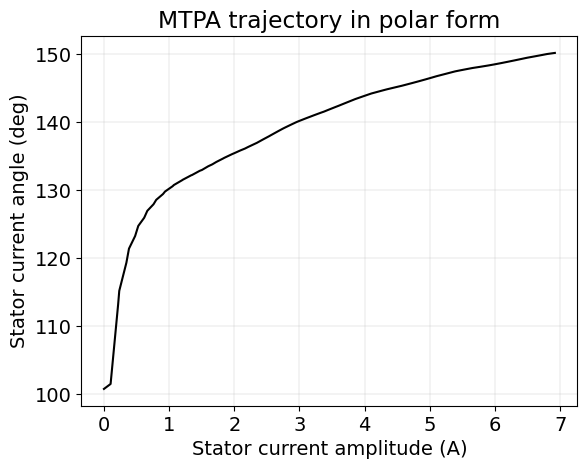

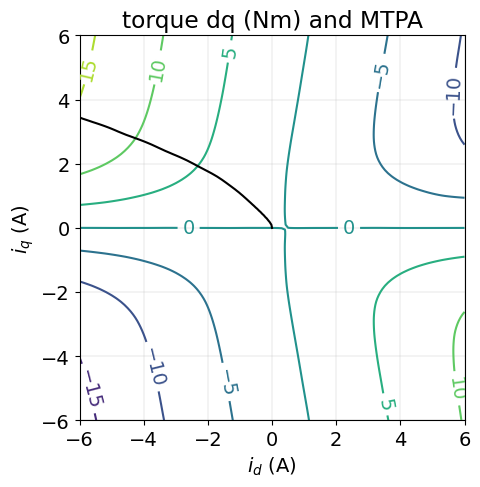

In [21]:
# Compute the MTPA trajectory
mot.calc_MTPA(method="analytical")
#mot.calc_MTPA(method="gradient")

plt.plot(mot.i_MTPA, mot.theta_MTPA*180/np.pi, 'k')
plt.xlabel('Stator current amplitude (A)'); plt.ylabel('Stator current angle (deg)')
plt.title('MTPA trajectory in polar form')
plt.grid(linewidth=0.2)
plt.show()

# we can also plot the MTPA trajectory along as the dq torque
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
CS = ax.contour(mot.i_d, mot.i_q, torque_dq)
ax.plot(mot.i_d_MTPA, mot.i_q_MTPA, 'k')
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('torque dq (Nm) and MTPA')
plt.grid(linewidth=0.2)
plt.show()

# Saliency and estimation error

The hf saliency is computed as:

$$
\begin{equation}
 \xi(i_d,i_q) = \frac{l_\Sigma(i_d,i_q) + \sqrt{l_\Delta^2(i_d,i_q)+l_{dq}^2(i_d,i_q)}}{l_\Sigma(i_d,i_q) - \sqrt{l_\Delta^2(i_d,i_q)+l_{dq}^2(i_d,i_q)}}
\end{equation}
$$

The estimation error when the observer is in open loop is computed as:

$$
\begin{equation}
 \varepsilon=
 \begin{cases}
  \frac{1}{2}\, \text{atan2}(-l_{dq}, l_{\Delta}), & \text{for PMA-SynRM} \\
  \frac{1}{2}\, \text{atan2}(l_{dq}, -l_{\Delta}), & \text{for SynRM}
 \end{cases}
\end{equation}
$$

computed saliency
computed sensored error using IPM convention


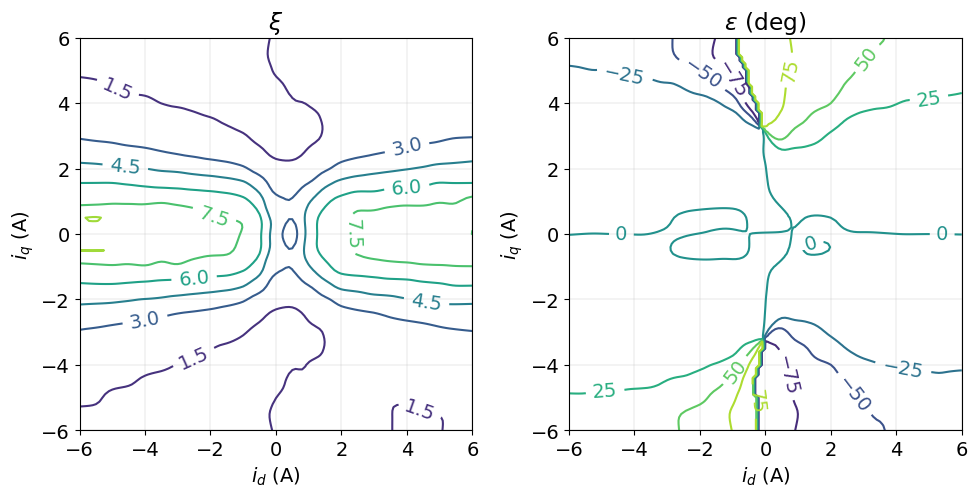

In [10]:
# compute saliency xi and estimation error epsilon
mot.calc_saliency()
mot.calc_sensored_error()

# plot saliency \xi and estimation error \epsilon
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
CS = ax.contour(mot.i_d, mot.i_q, mot.xi)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$\\xi$')
plt.grid(linewidth=0.2)

ax = fig.add_subplot(1, 2, 2)
CS = ax.contour(mot.i_d, mot.i_q, mot.epsilon_deg)
ax.clabel(CS, inline=True)
ax.set_aspect('equal')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
plt.title('$\\varepsilon$ (deg)')
plt.grid(linewidth=0.2)

fig.tight_layout()
plt.show()


# Sensored trajectory and convergence region

Given a reference trajectory, the sensored trajectory $t_1$ is computed as the deviation from the reference trajectory due to the effect of the estimation error $\varepsilon$ (when the observer is in open loop).

The convergence region deals with the sensorless operation (the estimated position is used for the control). The convergence region is the subset of points of $I_{hq}=0$ characterized by negative slope with respect to the current angle. $\Delta \theta$ and $I_{hq}$ are computed as:

$$
\begin{equation}
\Delta\theta(i_d,i_q)= \alpha_{ie}(i_d,i_q) - \theta_{REF}(I)\\
I_{hq} = - \frac{U_h}{2 \pi f_h} \frac{\sqrt{l_\Delta^2+l_{dq}^2}}{l_{dd}\,l_{qq}-l_{dq}\,l_{qd}} \sin(2 \Delta \theta - 2 \varepsilon)
\end{equation}
$$

The derivative of $I_{hq}$ with respect to the current angle $\alpha_{ie}$ can is computed as:

$$
\frac{\partial I_{hq}(i_d,i_q)}{\partial \alpha_{ie}}= - \frac{\partial I_{hq}(i_d,i_q)}{\partial i_d} \, i_q + \frac{\partial I_{hq}(i_d,i_q)}{\partial i_q} \, i_d
$$

The convergence region is extracted as the subset $I_{hq}=0$ with $\frac{\partial I_{hq}(i_d,i_q)}{\partial \alpha_{ie}}<0$.

REF is the reference trajectory<br/>
$t_1$ is the sensored trajectory<br/>
$t_2$ is the sensorless trajectory (part of the convergence region)

In [ ]:
# CASE 1:
# COMPUTE THE CONVERGENCE REGION USING THE MTPA AS REFERENCE

# initialize the reference trajectory
if hasattr(mot, 'i_REF'):
    delattr(mot, 'i_REF')
if hasattr(mot, 'theta_REF'):
    delattr(mot, 'theta_REF')
if hasattr(mot, 'i_d_REF'):
    delattr(mot, 'i_d_REF')
if hasattr(mot, 'i_q_REF'):
    delattr(mot, 'i_q_REF')

# set the MTPA as reference trajectory
mot.i_REF     = mot.i_MTPA
mot.theta_REF = mot.theta_MTPA

# compute sensored trajectory t1
mot.calc_sensored_trajectory()

# compute convergence region
Uh = 40
fh = 1000
mot.calc_convergence_region(Uh, fh)

# plot REF, t1, t2
fig, ax = plt.subplots(figsize=(5,5))
circle2 = plt.Circle((0, 0), 2, fill=False, linewidth=0.1)
circle4 = plt.Circle((0, 0), 4, fill=False, linewidth=0.1)
circle6 = plt.Circle((0, 0), 6, fill=False, linewidth=0.1)
ax.add_artist(circle2)
ax.add_artist(circle4)
ax.add_artist(circle6)
ax.plot(mot.i_d_REF, mot.i_q_REF, 'k', label='REF')
ax.plot(mot.i_d_sensored, mot.i_q_sensored, 'y', label='t1')
ax.contour(mot.i_d, mot.i_q, mot.Ihq, levels=[0], colors='r', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, mot.Ihq_neg, levels=[0], colors='b')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
ax.set_aspect('equal')
plt.title('Convergence region plot')
plt.legend(loc="upper right")
plt.grid(linewidth=0.2)
plt.show()

# LEGEND:
# black: reference trajectory REF
# yellow: sensored trajectory t1
# blue: Ihq=0 with negative slope (convergence region)
# red: Ihq=0 with positive slope (no convergence)

In [ ]:
# CASE 2:
# COMPUTE THE CONVERGENCE REGION USING A LINEAR TRAJECTORY AS REFERENCE

# initialize the reference trajectory
if hasattr(mot, 'i_REF'):
    delattr(mot, 'i_REF')
if hasattr(mot, 'theta_REF'):
    delattr(mot, 'theta_REF')
if hasattr(mot, 'i_d_REF'):
    delattr(mot, 'i_d_REF')
if hasattr(mot, 'i_q_REF'):
    delattr(mot, 'i_q_REF')

# set linear 130deg as reference trajectory
mot.i_REF     = np.linspace(start=0, stop=6, num=50)
mot.theta_REF = np.ones(mot.i_REF.shape)*np.pi/180 * 130

# compute sensored trajectory t1
mot.calc_sensored_trajectory()

# compute convergence region
Uh = 40
fh = 1000
mot.calc_convergence_region(Uh, fh)

# plot REF, t1, t2
fig, ax = plt.subplots(figsize=(5,5))
circle2 = plt.Circle((0, 0), 2, fill=False, linewidth=0.1)
circle4 = plt.Circle((0, 0), 4, fill=False, linewidth=0.1)
circle6 = plt.Circle((0, 0), 6, fill=False, linewidth=0.1)
ax.add_artist(circle2)
ax.add_artist(circle4)
ax.add_artist(circle6)
ax.plot(mot.i_d_REF, mot.i_q_REF, 'k', label='REF')
ax.plot(mot.i_d_sensored, mot.i_q_sensored, 'y', label='t1')
ax.contour(mot.i_d, mot.i_q, mot.Ihq, levels=[0], colors='r', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, mot.Ihq_neg, levels=[0], colors='b')
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
ax.set_aspect('equal')
plt.title('Convergence region plot')
plt.legend(loc="upper right")
plt.grid(linewidth=0.2)
plt.show()

# LEGEND:
# black: reference trajectory REF
# yellow: sensored trajectory t1
# blue: Ihq=0 with negative slope (convergence region)
# red: Ihq=0 with positive slope (no convergence)